## افزودن کتاب‌خانه‌های مورد استفاده

In [123]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg.linalg import norm

## خواندن داده از فایل

In [124]:
iris = pd.read_csv('iris_data.csv', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "target"])
iris

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## نمایش گرافیکی داده برحسب ویژگی طول سپال برای نمونه

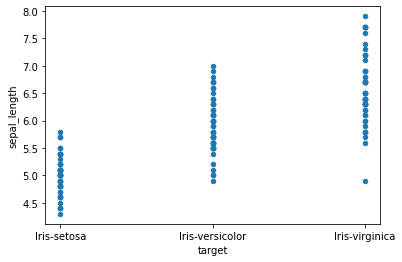

In [ ]:
iris.plot(kind="scatter", x = 'target', y = 'sepal_length')
plt.show()

# پیش‌پردازش

## پیدا کردن سطرهای بدون مقدار و ناقص

In [ ]:
def print_nans():
    # Find and show NaNs
    print('Number of sepal_length NaNs:', len(iris[iris['sepal_length'].isna()]))
    print(iris[iris['sepal_length'].isna()])
    # print(len(df['sepal_length'].dropna()))

    # print((df['sepal_length'].isna()).where(df['sepal_length'] == True))
    # print_hi('PyCharm')

    print('\n\nNumber of sepal_width NaNs:', len(iris[iris['sepal_width'].isna()]))
    print(iris[iris['sepal_width'].isna()])

    print('\n\nNumber of petal_length NaNs:', len(iris[iris['petal_length'].isna()]))
    print(iris[iris['petal_length'].isna()])

    print('\n\nNumber of petal_width NaNs:', len(iris[iris['petal_width'].isna()]))
    print(iris[iris['petal_width'].isna()])

    print('\n\nNumber of target NaNs:', len(iris[iris['target'].isna()]))
    print(iris[iris['target'].isna()])

In [ ]:
print_nans()

Number of sepal_length NaNs: 0
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target]
Index: []


Number of sepal_width NaNs: 0
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target]
Index: []


Number of petal_length NaNs: 0
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target]
Index: []


Number of petal_width NaNs: 0
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target]
Index: []


Number of target NaNs: 0
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target]
Index: []


همانطور که می‌بینیم، تمامی سطرها مقدار دارند و سطر بدون مقدار نداریم

## حذف داده‌های ناقص و بدون مقدار

In [ ]:
def remove_nans():
    # print(df[df.isna()])
    global iris
    print('\n\nNumber of rows = ', len(iris))
    iris = iris.dropna()
    iris.reset_index(drop=True)
    print('NaNs were removed. Number of rows = ', len(iris))

In [ ]:
remove_nans()



Number of rows =  150
NaNs were removed. Number of rows =  150


همانطور که می‌بینیم، هیچ سطری تغییر نکرد زیرا تمامی سطرها مقدار دارند و سطر بدون مقدار نداریم

# پیاده‌سازی K-means

## ابتدا باید به هر نمونه داده، یک کلاس را به صورت رندم اختصاص بدهیم

In [ ]:
def apply_clusters(nodes, number_of_clusters):
    nodes['cluster'] = nodes.apply(lambda x: random.randint(0, number_of_clusters-1), axis=1)

In [ ]:
apply_clusters(iris, 3)
iris

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0


## با  تابع زیر مراکز را آپدیت می‌کنیم. به این صورت که مرکز جدید هر دسته را برابر میانگین مقادیر آن دسته قرار می‌دهیم

In [138]:
def calculate_centroids(nodes, number_of_clusters):
  means = []
  for i in range(number_of_clusters):
    temp_nodes = nodes.loc[nodes['cluster'] == i]
    means.append(temp_nodes.mean().iloc[0:4])
  return means

## با این تابع، خوشه مربوط به هر داده را با نزدیک‌ترین مرکز به آن داده بروزرسانی می‌کنیم. برای محاسبه فاصله از تفاوت مقدار فیچرها به صورت نرم شده استفاده کرده‌ایم

In [125]:
def update_clusters(nodes, centroids):
  changed = False
  for index, node in nodes.iterrows():
    distances = [norm((node.iloc[0:4] - centroid).to_numpy()) for centroid in centroids]
    new_cluster = distances.index(min(distances))
    if new_cluster != node['cluster']:
       changed = True
    nodes.at[index, 'cluster'] = new_cluster
  return changed

## در یک حلقه تا جایی که مراکز دیگر آپدیت نشوند، فرایند برروزرسانی مراکز و خوشه‌ی هر داده را تکرار می‌کنیم

In [140]:
changed = True
number_of_clusters = 3
apply_clusters(iris, number_of_clusters)
itteration = 0

while changed:
  centroids = calculate_centroids(iris, number_of_clusters)
  changed = update_clusters(iris, centroids)
  itteration += 1

print(f'Centroids: {centroids}')

print(f'Number of Itterations: {itteration}')

<ipython-input-138-875ab929879a>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means.append(temp_nodes.mean().iloc[0:4])


Centroids: [sepal_length    5.883607
sepal_width     2.740984
petal_length    4.388525
petal_width     1.434426
dtype: float64, sepal_length    6.853846
sepal_width     3.076923
petal_length    5.715385
petal_width     2.053846
dtype: float64, sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64]
Number of Itterations: 13


مراکز نهایی چاپ شده‌اند. هم چنین می‌بینی که در ۱۱ پیمایش به شرط توقف می‌رسیم و دیگر مراکز و خوشه‌ی داده‌ها تغییر نمی‌کند.

# مصورسازی

## نمایش گرافیکی پراکندگی داده‌ها برحسب دو ویژگی که خوشه‌ها با ۳ رنگ نمایش داده‌شده‌اند. پس داده‌های همرنگ مربوط به یک خوشه هستند

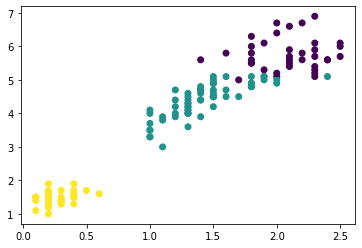

In [134]:
plt.scatter(x = iris['petal_width'], y = iris['petal_length'], c=iris['cluster'])
plt.show()

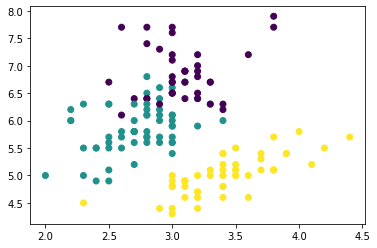

In [135]:
plt.scatter(x = iris['sepal_width'], y = iris['sepal_length'], c=iris['cluster'])
plt.show()

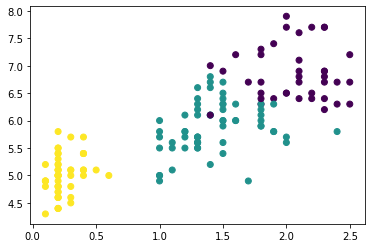

In [136]:
plt.scatter(x = iris['petal_width'], y = iris['sepal_length'], c=iris['cluster'])
plt.show()

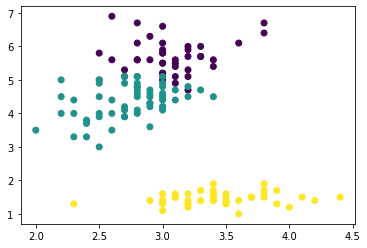

In [137]:
plt.scatter(x = iris['sepal_width'], y = iris['petal_length'], c=iris['cluster'])
plt.show()